## The Spark Foundation - Data Science & Business Analytics Intership

### Task 2 - Prediction Using Unsupervised Machine Learning.
In this task main goal is to find optimum number of cluster for the Iris dataset.

### Task Done By - Rahul Sali

## Steps 

- Step 1 : Loading/Importing neccesary Library.
- Step 2 : Drop some coloum.
- Step 3 : Determining the Optimum Number of Clusters Using the Elbow Method.
- Step 4 : Applying K-Means Clustering on the data.
- Step 5 : Visualising the Clusters.



### Step 1 : Loading/Importing Library

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [8]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Step 2 - Drop some column

In [10]:
t=df.drop(['Species','Id'],axis=1)
t.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Step 3 - Determining the Optimum Number of Clusters Using the Elbow Method

##### Brife of Elbow Method
In this method the number of clusters are varies within a certain range. For each number, within-cluster sum of square(WCSS). There are verious methods available but we used Elbow method here.

In [11]:
#Within cluster sum of square
wcss = []
cluster_range = range(1,15)
for k in cluster_range:
    km = KMeans(n_clusters=k)
    km = km.fit(t)
    wcss.append(km.inertia_)

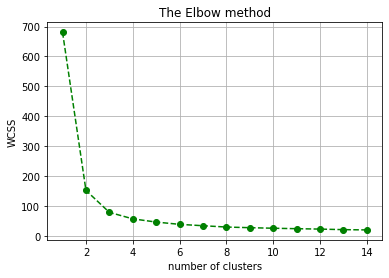

In [12]:
#plotting the WCSS aginst Clusters range
plt.plot(cluster_range,wcss,'go--',color='green')
plt.title('The Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

###### We can clearly see why it is called "The elbow method" from the above graph, the optimum clusters is where the elbow occurs. This is when the within-cluster sum of square (WCSS) does not decrease significantly.
###### From the we choose the number of clusters as - 3

### Step 4 - Applying K-Means Clustering on the data

In [13]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
predict=model.fit_predict(t)

### Step 5 -  Visualising the Clusters

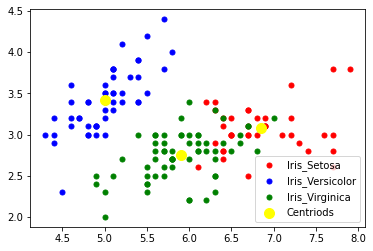

In [14]:
x=t.iloc[:,[0,1,2,3]].values
plt.scatter(x[predict==0,0],x[predict==0,1],s=25,c='Red',label='Iris_Setosa')
plt.scatter(x[predict==1,0],x[predict==1,1],s=25,c='blue',label='Iris_Versicolor')
plt.scatter(x[predict==2,0],x[predict==2,1],s=25,c='green',label='Iris_Virginica')
#Plotting the cluster Centers
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,c='yellow',label='Centriods')
plt.legend()
plt.show()